In [1]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm_notebook as tqdm
import similaritymeasures
from sklearn.cluster import DBSCAN

%matplotlib inline
plt.style.use('ggplot')
#%matplotlib qt
#%matplotlib notebook

In [2]:
rootDir = r'C:\Users\kj4755\OneDrive - The Open University\SPIN\data\clouds'
#rootDir = r'/Users/kunal/OneDrive - The Open University/SPIN/data/level_1p0_data/New occultations'
os.chdir(rootDir)
list_of_files = np.array(os.listdir(os.getcwd()))

r = []
idx = []
for each_file in tqdm(list_of_files):

    file = h5py.File(rootDir + '\%s' %each_file,'r')
    #file = h5py.File(r'/Users/kunal/OneDrive - The Open University/SPIN/data/level_1p0_data/New occultations/%s' %each_file,'r')
    r.append(np.array(file['ratio_blue_uv']).flatten())
    idx.append(range(len(np.array(file['ratio_blue_uv']).flatten())))

r = np.array(r)
idx = np.array(idx)

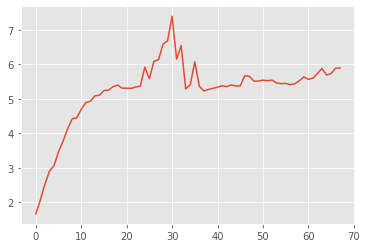

In [3]:
plt.plot(r[10])

In [4]:
dm = np.zeros((len(r),len(r)))

for i in tqdm(range(len(r))):
    
    t0 = np.zeros((len(r[i]),2))
    t0[:,0] = np.arange(len(r[i]))
    t0[:,1] = r[i]
    
    for j in range(len(r)):
        t1 = np.zeros((len(r[j]),2))
        t1[:,0] = np.arange(len(r[j]))
        t1[:,1] = r[j]
        
        dm[i,j] =similaritymeasures.dtw(t0,t1)[0]
        #dm[i,j] =fastdtw(t0,t1,dist = euclidean)[0]

KeyboardInterrupt: 

In [ ]:
np.savetxt(r'C:\Users\kj4755\OneDrive - The Open University\SPIN\Transmission\Clusters\Clouds\dm 1.txt',dm)

In [ ]:
dm

In [ ]:
eps = 300
min_samples = 7
clustering = DBSCAN(eps=eps, min_samples=min_samples, metric = 'precomputed').fit(dm)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

In [ ]:
labels

In [ ]:
for i in tqdm(set(labels)):
    
    idx = np.array(np.where(labels == i)).flatten()
    directory = r'C:\Users\kj4755\OneDrive - The Open University\SPIN\Transmission\Clusters\Clouds\eps %s min_samples %s' %(eps,min_samples)
    sub_dir = directory + '\Cluster %s' %i
    if not os.path.exists(sub_dir):
        os.makedirs(sub_dir)
    
    for _ in idx:
        plt.clf()
        plt.plot(r[_],color = 'k')
        plt.savefig(sub_dir +'\%s.png' %list_of_files[_])
        
    np.savetxt(directory + '\\Cluster %s files.txt' %i,list_of_files[idx],fmt = '%s')